In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('ba_forage.csv')
df.head()

,rating,country,text,date
0,1.0,United Kingdom,"✅ , | As usual the flight is delayed. BA try t...",4th August 2023
1,10.0,Hong Kong,"✅ , | I had the most fantastic BA Flight toda...",1st August 2023
2,1.0,United Kingdom,"✅ , | Couldn’t book in online. Arrived at che...",31st July 2023
3,9.0,Iceland,"✅ , | London Heathrow to Mumbai in a Boeing 78...",31st July 2023
4,6.0,Iceland,"✅ , | Keflavík, Iceland to London Heathrow on ...",31st July 2023


In [5]:
df.rename(columns = {'text' : 'review'},inplace = True)
df['date'] = pd.to_datetime(df['date'],format='mixed')
df['verified'] = df['review'].str.contains("✅")
df['review'] = df['review'].str.lstrip('✅ , | ')

In [6]:
df.head()

,rating,country,review,date,verified
0,1.0,United Kingdom,As usual the flight is delayed. BA try to blam...,2023-08-04,True
1,10.0,Hong Kong,I had the most fantastic BA Flight today. The ...,2023-08-01,True
2,1.0,United Kingdom,Couldn’t book in online. Arrived at check in t...,2023-07-31,True
3,9.0,Iceland,London Heathrow to Mumbai in a Boeing 787-8 in...,2023-07-31,True
4,6.0,Iceland,"Keflavík, Iceland to London Heathrow on an A32...",2023-07-31,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   rating    3612 non-null   float64       
 1   country   3615 non-null   object        
 2   review    3617 non-null   object        
 3   date      3617 non-null   datetime64[ns]
 4   verified  3617 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 116.7+ KB


# Sentiment Analysis

In [8]:
import nltk

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
df['scores'] = df['review'].apply(lambda x: sid.polarity_scores(x))

In [12]:
df['compound'] = df['scores'].apply(lambda x: x['compound'])

In [13]:
df.head()

,rating,country,review,date,verified,scores,compound
0,1.0,United Kingdom,As usual the flight is delayed. BA try to blam...,2023-08-04,True,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",-0.7579
1,10.0,Hong Kong,I had the most fantastic BA Flight today. The ...,2023-08-01,True,"{'neg': 0.014, 'neu': 0.754, 'pos': 0.232, 'co...",0.9927
2,1.0,United Kingdom,Couldn’t book in online. Arrived at check in t...,2023-07-31,True,"{'neg': 0.079, 'neu': 0.792, 'pos': 0.129, 'co...",0.5709
3,9.0,Iceland,London Heathrow to Mumbai in a Boeing 787-8 in...,2023-07-31,True,"{'neg': 0.058, 'neu': 0.742, 'pos': 0.2, 'comp...",0.9708
4,6.0,Iceland,"Keflavík, Iceland to London Heathrow on an A32...",2023-07-31,True,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.061, 'co...",-0.2263


In [14]:
def rating_score(rating):
    if rating >= 6:
        return 'pos'
    elif 4<rating <6:
        return 'neu'
    else:
        return 'neg'

In [15]:
df['rating_score'] = df['rating'].apply(rating_score)

In [16]:
def sentiment(compound):
    if compound <= -0.1:
        return 'neg'
    elif -0.1 < compound < 0.1:
        return 'neu'
    else:
        return 'pos'

In [17]:
df['compound_score'] = df['compound'].apply(sentiment)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
print(pd.DataFrame(confusion_matrix(df['rating_score'], df['compound_score']),index = ['pos','neu','neg'], columns = ['pos','neu','neg']))

      pos  neu   neg
pos  1243   64   582
neu    81   10   141
neg   107   21  1368


In [20]:
print(accuracy_score(df['rating_score'],df['compound_score']))

0.7246336743157312


In [21]:
print(classification_report(df['rating_score'], df['compound_score']))

              precision    recall  f1-score   support

         neg       0.87      0.66      0.75      1889
         neu       0.11      0.04      0.06       232
         pos       0.65      0.91      0.76      1496

    accuracy                           0.72      3617
   macro avg       0.54      0.54      0.52      3617
weighted avg       0.73      0.72      0.71      3617



In [22]:
df['compound_score'].value_counts()

compound_score
pos    2091
neg    1431
neu      95
Name: count, dtype: int64

In [23]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet

lemma = WordNetLemmatizer()

corpus = [] 
reviews_data = df.review

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ',rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [24]:
df['corpus'] = corpus
df.head()

,rating,country,review,date,verified,scores,compound,rating_score,compound_score,corpus
0,1.0,United Kingdom,As usual the flight is delayed. BA try to blam...,2023-08-04,True,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",-0.7579,neg,neg,usual flight delayed ba try blame someone inab...
1,10.0,Hong Kong,I had the most fantastic BA Flight today. The ...,2023-08-01,True,"{'neg': 0.014, 'neu': 0.754, 'pos': 0.232, 'co...",0.9927,pos,pos,fantastic ba flight today cabin crew seat zone...
2,1.0,United Kingdom,Couldn’t book in online. Arrived at check in t...,2023-07-31,True,"{'neg': 0.079, 'neu': 0.792, 'pos': 0.129, 'co...",0.5709,neg,pos,book online arrived check find bumped due over...
3,9.0,Iceland,London Heathrow to Mumbai in a Boeing 787-8 in...,2023-07-31,True,"{'neg': 0.058, 'neu': 0.742, 'pos': 0.2, 'comp...",0.9708,pos,pos,london heathrow mumbai boeing business class l...
4,6.0,Iceland,"Keflavík, Iceland to London Heathrow on an A32...",2023-07-31,True,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.061, 'co...",-0.2263,pos,neg,keflav k iceland london heathrow business clas...


In [25]:
import matplotlib.pyplot as plt
import os
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

stop_words= set(stopwords.words('english'))
stop_words.update(['ba','flight','british', 'airway', 'airline','plane','told','also','passenger','also',
                   'food','seat','cabin','crew','lounge', 'business','class','service','airport','economy',
                   'aircraft','staff','fly','heathrow','london','flying','customer','even','like',
                  'would','could'])

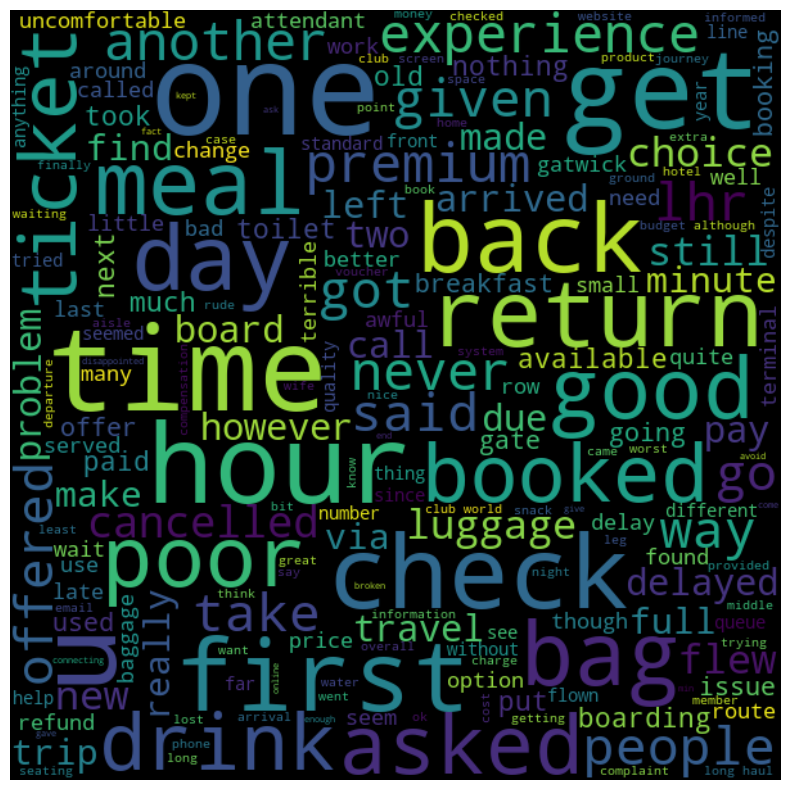

In [51]:
negative_reviews = " ".join(df[df['compound_score'] == 'neg']['corpus'])
plt.figure(figsize = (20,10))
wordcloud = WordCloud(height = 600, width = 600, max_font_size = 100, max_words = 200, stopwords = stop_words).generate(negative_reviews)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

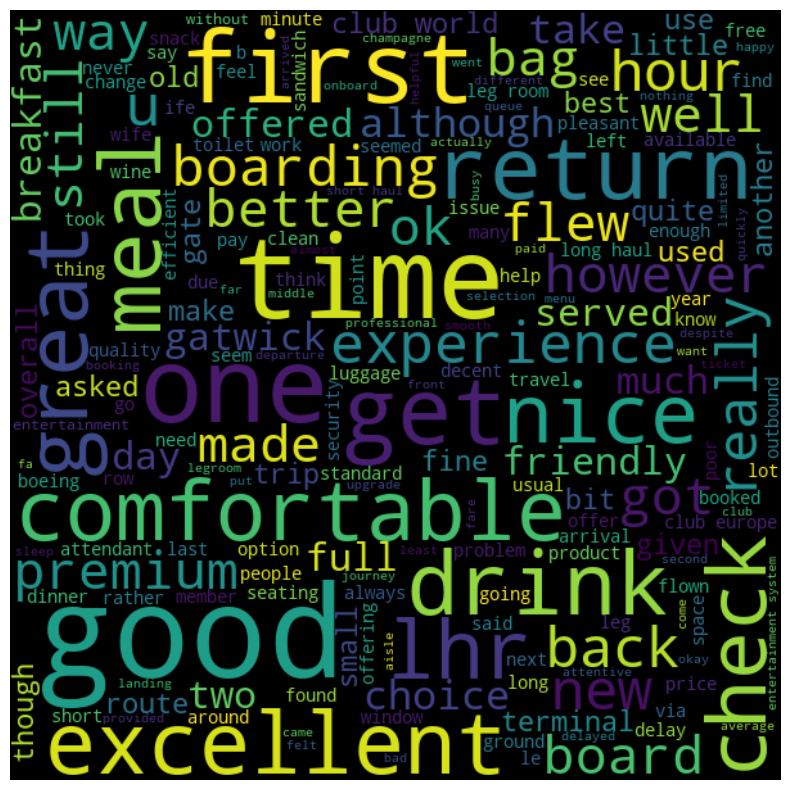

In [52]:
positive_reviews = " ".join(df[df['compound_score'] == 'pos']['corpus'])
plt.figure(figsize = (20,10))
wordcloud = WordCloud(height = 600, width = 600, max_font_size = 100, max_words = 200, stopwords = stop_words).generate(positive_reviews)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Topic Modelling

In [30]:
df.head()

,rating,country,review,date,verified,scores,compound,rating_score,compound_score,corpus
0,1.0,United Kingdom,As usual the flight is delayed. BA try to blam...,2023-08-04,True,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",-0.7579,neg,neg,usual flight delayed ba try blame someone inab...
1,10.0,Hong Kong,I had the most fantastic BA Flight today. The ...,2023-08-01,True,"{'neg': 0.014, 'neu': 0.754, 'pos': 0.232, 'co...",0.9927,pos,pos,fantastic ba flight today cabin crew seat zone...
2,1.0,United Kingdom,Couldn’t book in online. Arrived at check in t...,2023-07-31,True,"{'neg': 0.079, 'neu': 0.792, 'pos': 0.129, 'co...",0.5709,neg,pos,book online arrived check find bumped due over...
3,9.0,Iceland,London Heathrow to Mumbai in a Boeing 787-8 in...,2023-07-31,True,"{'neg': 0.058, 'neu': 0.742, 'pos': 0.2, 'comp...",0.9708,pos,pos,london heathrow mumbai boeing business class l...
4,6.0,Iceland,"Keflavík, Iceland to London Heathrow on an A32...",2023-07-31,True,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.061, 'co...",-0.2263,pos,neg,keflav k iceland london heathrow business clas...


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')

In [33]:
dtm = tfidf.fit_transform(df['review'])

In [34]:
dtm

<3617x7862 sparse matrix of type '<class 'numpy.float64'>'
	with 222162 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.decomposition import NMF

In [36]:
nmf_model = NMF(n_components = 4, random_state =42)

In [37]:
nmf_model.fit(dtm)

NMF(n_components=4, random_state=42)

In [38]:
len(tfidf.get_feature_names_out())

7862

In [39]:
nmf_model.components_

array([[0.        , 0.        , 0.        , ..., 0.00398192, 0.00640964,
        0.        ],
       [0.05670432, 0.01763937, 0.00230769, ..., 0.        , 0.        ,
        0.02444028],
       [0.        , 0.01821438, 0.00249694, ..., 0.00269064, 0.        ,
        0.0005406 ],
       [0.03010353, 0.        , 0.00907777, ..., 0.00460691, 0.02042345,
        0.02398904]])

In [40]:
nmf_model.components_[0].argsort()

array([   0, 3765, 3767, ..., 1341, 2033, 3333])

In [41]:
for component in range(len(nmf_model.components_)):
    print(f'THE TOP 15 WORDS FOR TOPIC #{component}')
    print([tfidf.get_feature_names_out()[i] for i in nmf_model.components_[component].argsort()[-15:]])
    print('\n')
    

THE TOP 15 WORDS FOR TOPIC #0
['entertainment', 'seats', 'aircraft', 'ba', 'excellent', 'lhr', 'service', 'great', 'seat', 'comfortable', 'flight', 'food', 'cabin', 'crew', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['flights', 'airport', 'staff', 'cancelled', 'booked', 'service', 'airline', 'london', 'hours', 'told', 'customer', 'airways', 'british', 'ba', 'flight']


THE TOP 15 WORDS FOR TOPIC #2
['passengers', 'poor', 'food', 'british', 'airways', 'lounge', 'middle', 'club', 'premium', 'ba', 'seats', 'economy', 'seat', 'business', 'class']


THE TOP 15 WORDS FOR TOPIC #3
['good', 'fast', 't5', 'arrived', 'gate', 'crew', 'late', 'security', 'quick', 'minutes', 'time', 'flight', 'check', 'lounge', 'boarding']




In [42]:
topic_results = nmf_model.transform(dtm)

In [43]:
df['Topic'] = topic_results.argmax(axis = 1)

In [44]:
dict = {0 :'in-flight services' ,
        1 :'flight booking',
        2 :'seat' ,
        3 :'check-in process'}

In [45]:
df['Topic Label'] = df['Topic'].map(dict)

In [46]:
df.head()

,rating,country,review,date,verified,scores,compound,rating_score,compound_score,corpus,Topic,Topic Label
0,1.0,United Kingdom,As usual the flight is delayed. BA try to blam...,2023-08-04,True,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",-0.7579,neg,neg,usual flight delayed ba try blame someone inab...,1,flight booking
1,10.0,Hong Kong,I had the most fantastic BA Flight today. The ...,2023-08-01,True,"{'neg': 0.014, 'neu': 0.754, 'pos': 0.232, 'co...",0.9927,pos,pos,fantastic ba flight today cabin crew seat zone...,0,in-flight services
2,1.0,United Kingdom,Couldn’t book in online. Arrived at check in t...,2023-07-31,True,"{'neg': 0.079, 'neu': 0.792, 'pos': 0.129, 'co...",0.5709,neg,pos,book online arrived check find bumped due over...,1,flight booking
3,9.0,Iceland,London Heathrow to Mumbai in a Boeing 787-8 in...,2023-07-31,True,"{'neg': 0.058, 'neu': 0.742, 'pos': 0.2, 'comp...",0.9708,pos,pos,london heathrow mumbai boeing business class l...,2,seat
4,6.0,Iceland,"Keflavík, Iceland to London Heathrow on an A32...",2023-07-31,True,"{'neg': 0.068, 'neu': 0.872, 'pos': 0.061, 'co...",-0.2263,pos,neg,keflav k iceland london heathrow business clas...,2,seat


In [47]:
Topics = df.groupby('Topic Label')['Topic Label'].count()
Topics.sort_values(ascending = False, inplace = True)

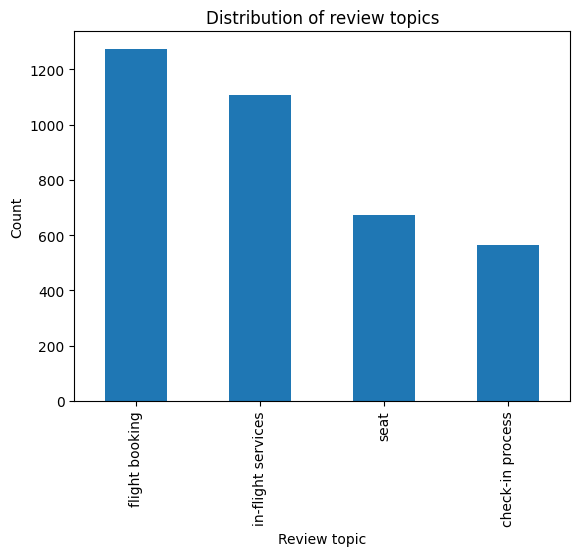

In [48]:
bars = Topics.plot(kind ='bar')
plt.xlabel('Review topic')
plt.ylabel('Count')
plt.title('Distribution of review topics')
plt.show()

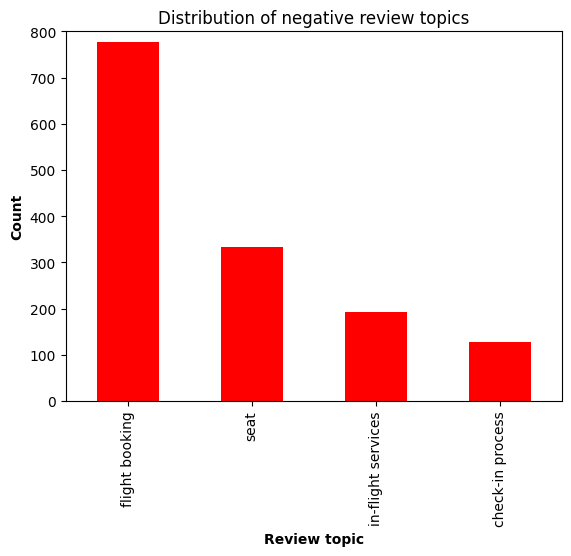

In [49]:
negative_reviews = df[df['compound_score'] == 'neg']
Negative_topics = negative_reviews.groupby('Topic Label')['Topic Label'].count()
Negative_topics.sort_values(ascending = False, inplace = True)
bars_neg = Negative_topics.plot(kind ='bar', color = 'red')
plt.xlabel('Review topic', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.title('Distribution of negative review topics')
plt.ylim(0,800)
plt.show()

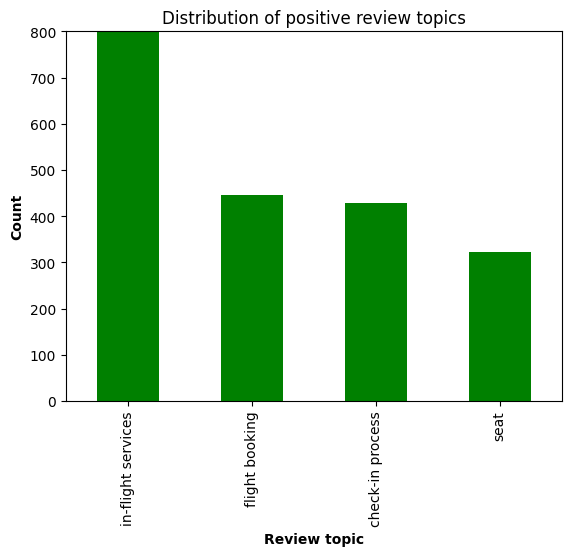

In [50]:
positive_reviews = df[df['compound_score'] == 'pos']
positive_topics = positive_reviews.groupby('Topic Label')['Topic Label'].count()
positive_topics.sort_values(ascending = False, inplace = True)
bars_pos = positive_topics.plot(kind ='bar', color = 'green')
plt.xlabel('Review topic', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.title('Distribution of positive review topics')
plt.ylim(0,800)
plt.show()